In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import importlib.util
import sys
import os

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN as SK_DBSCAN
from sklearn.decomposition import PCA as SKPCA

In [2]:
df = pd.read_csv('../dataset/dataset2.csv')

print("Ukuran dataset : ", df.shape)

df.head()

Ukuran dataset :  (569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


## Exploratory Data Analysis (EDA)

### 1. Statistik Dasar Data Tiap Kolom/Fitur
#### Fitur Numerik


In [4]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_stats = numeric_features.describe().T
print(numeric_stats.shape[0])
numeric_stats

32


,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#### Fitur Kategorikal


In [5]:
categorical_features = df.select_dtypes(exclude=[np.number])
categorical_stats = categorical_features.describe().T
print(categorical_features.shape[0])
categorical_features

569


,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


### 2. Pengecekan Nilai Null


In [6]:
null_values = df.isnull().sum()
print("Jumlah nilai null per kolom:")
print(null_values[null_values > 0])

Jumlah nilai null per kolom:
Unnamed: 32    569
dtype: int64


### 3. Distribusi Data

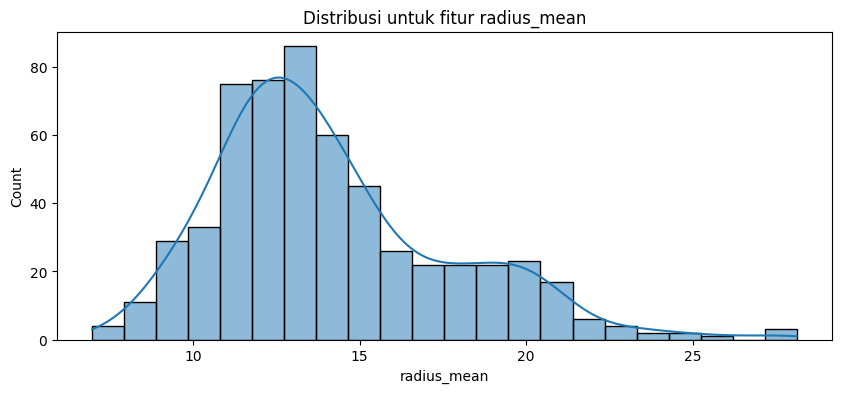

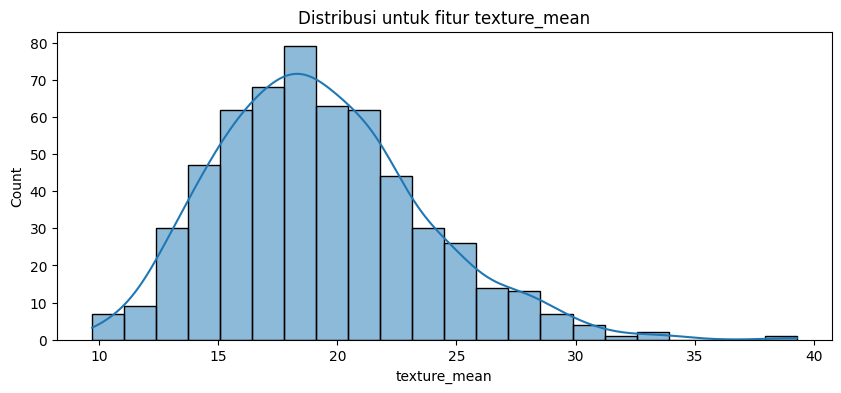

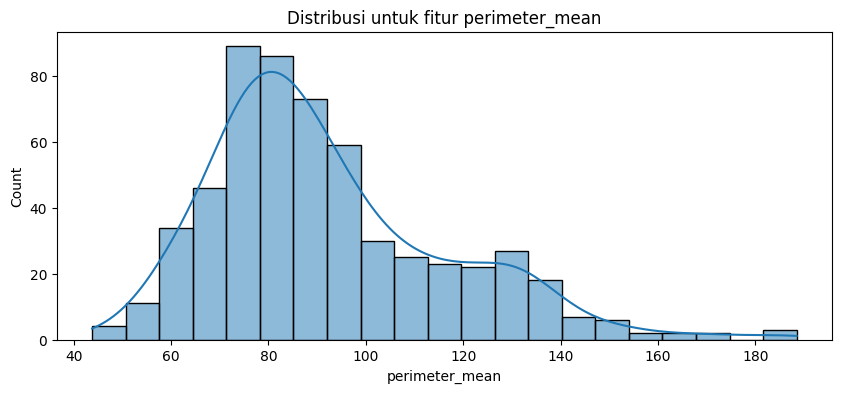

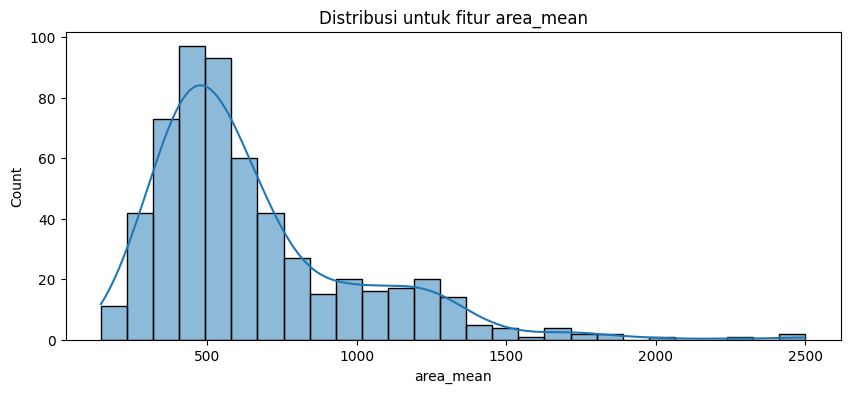

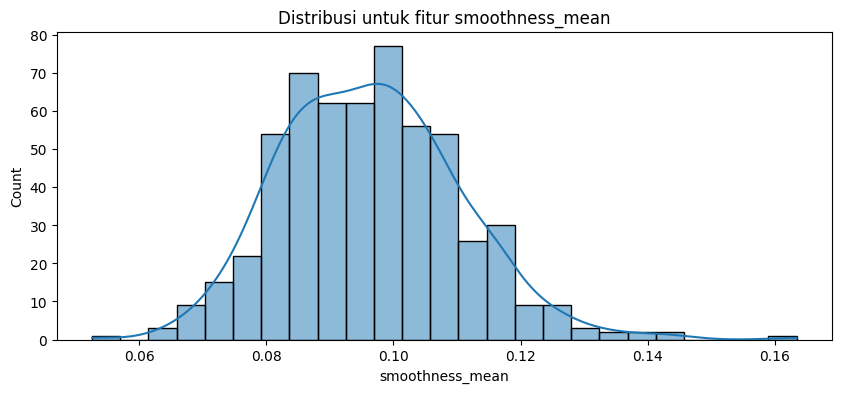

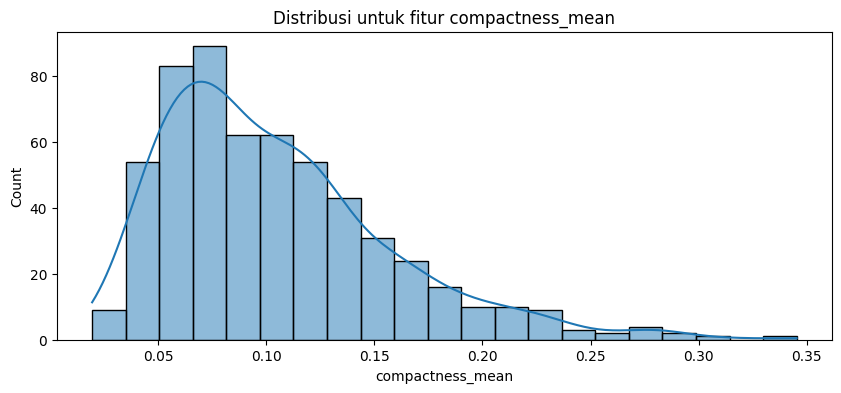

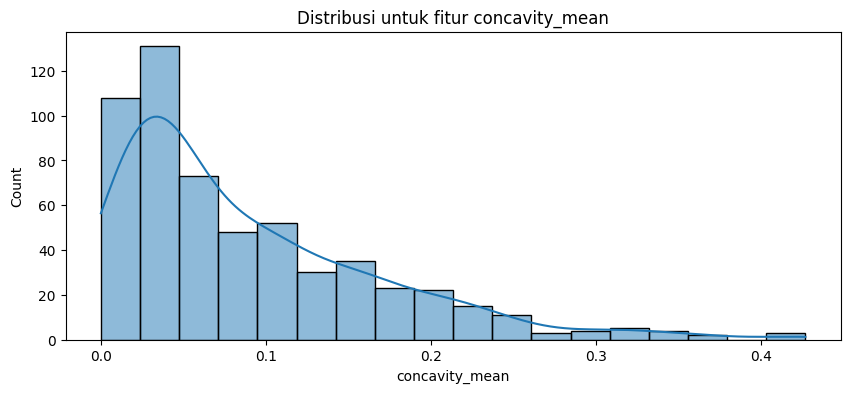

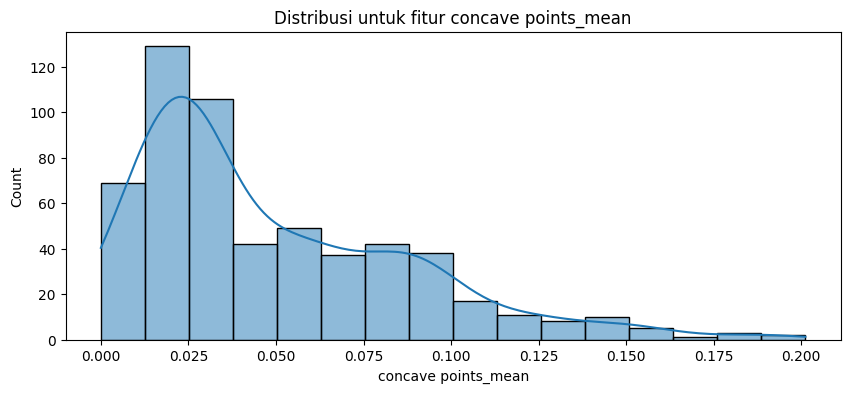

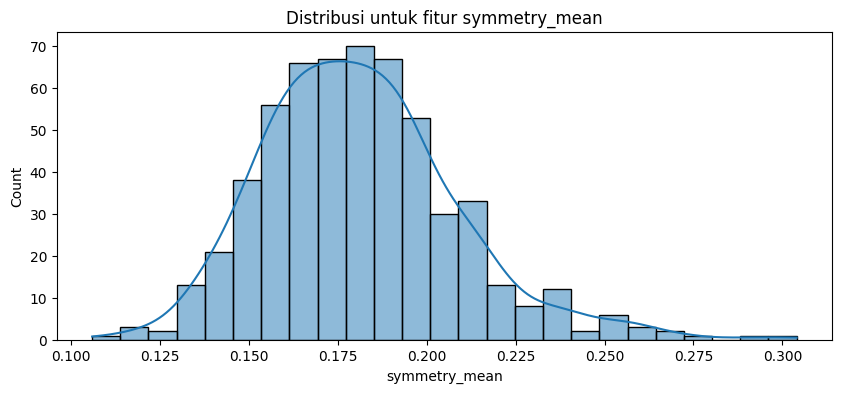

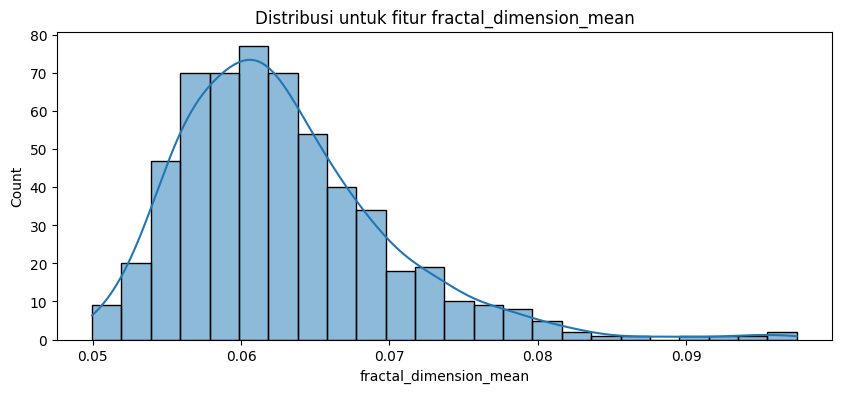

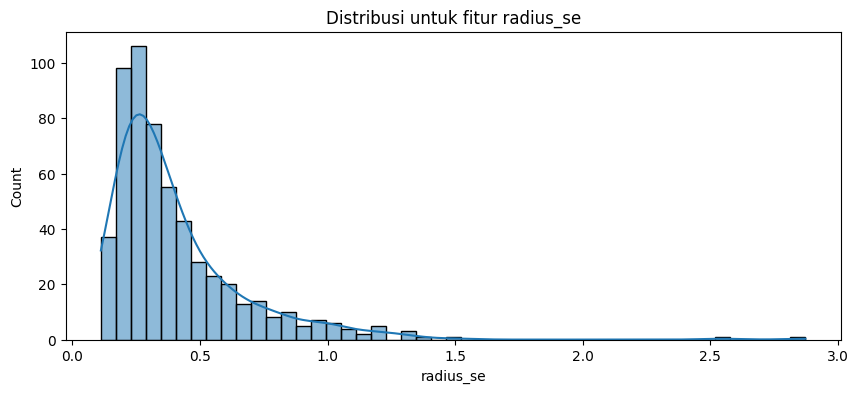

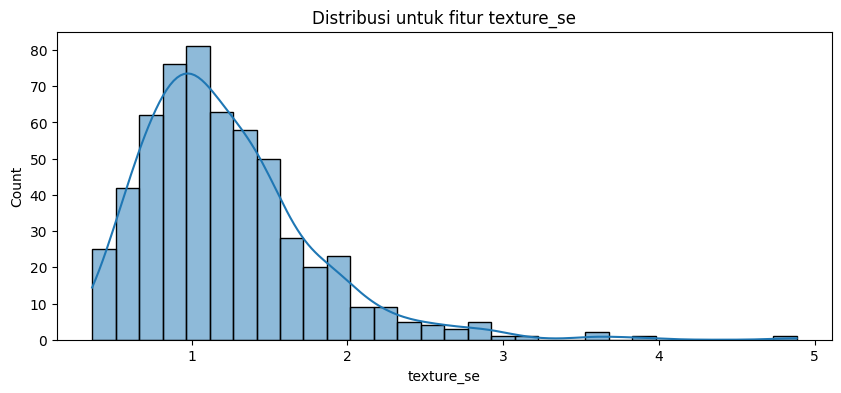

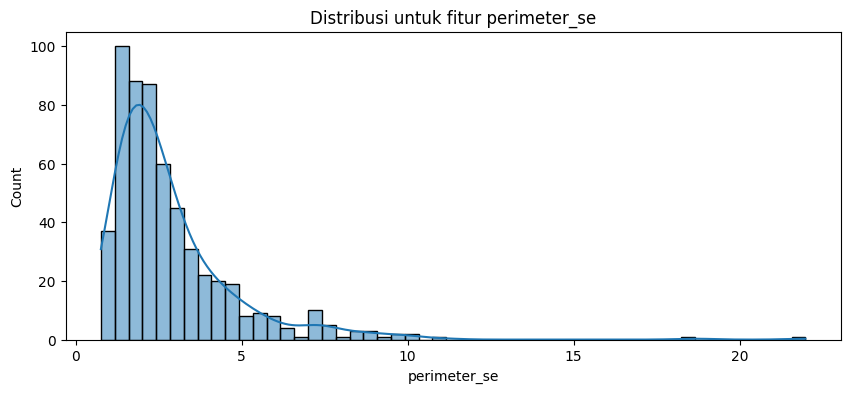

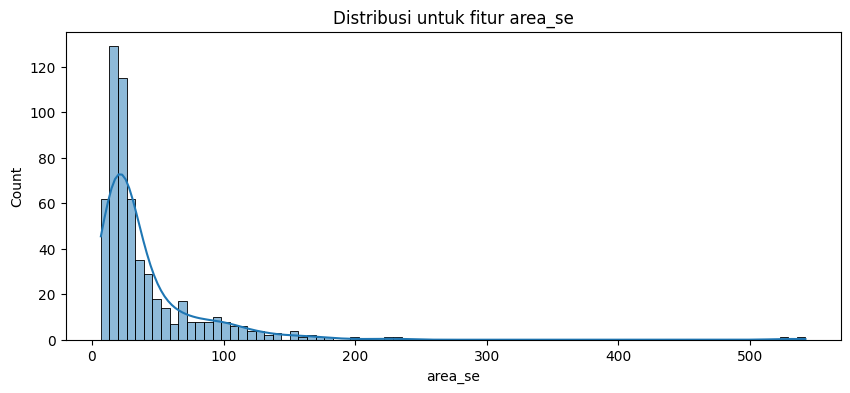

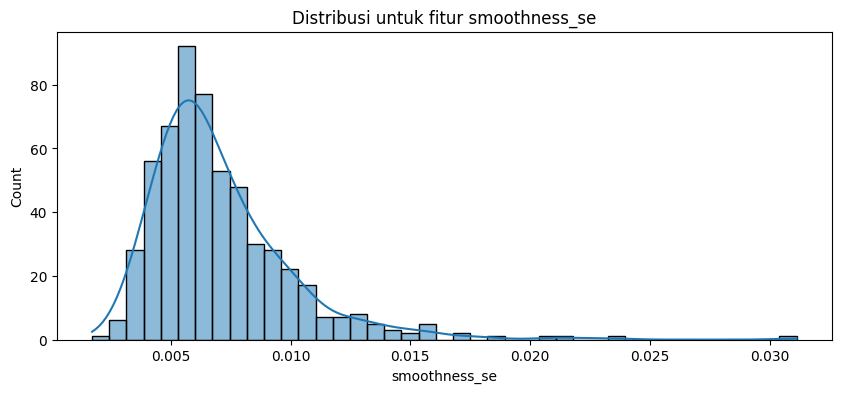

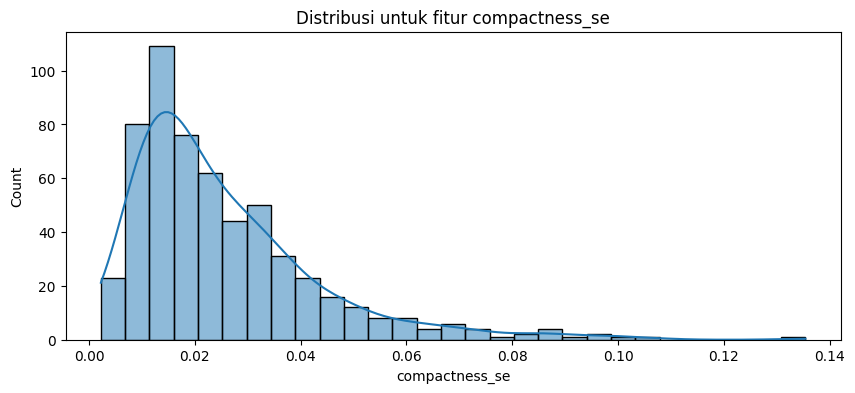

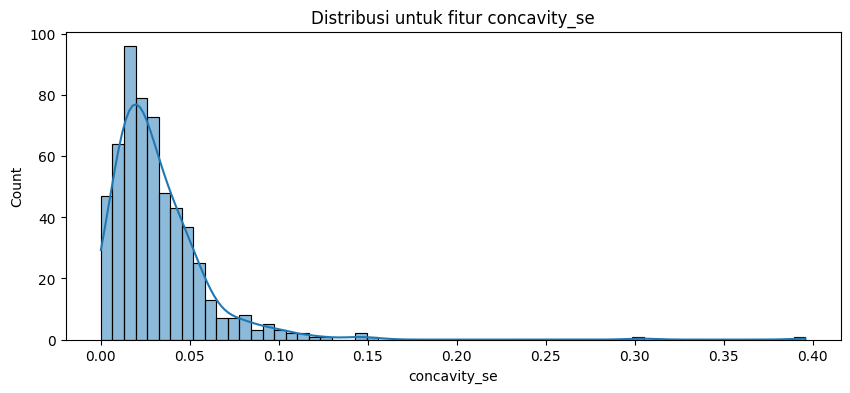

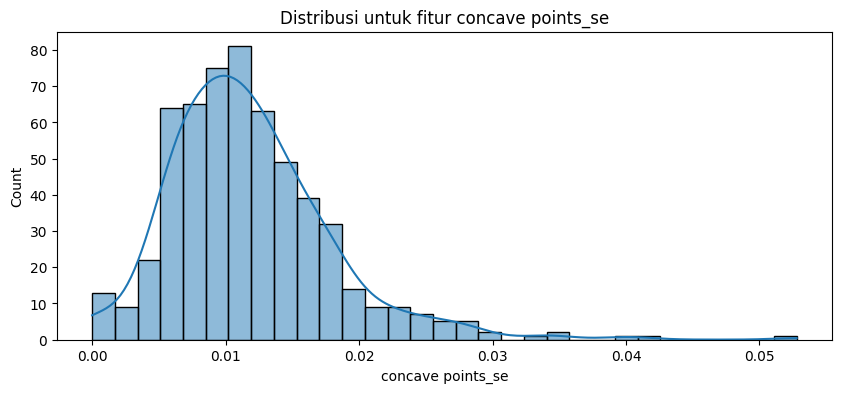

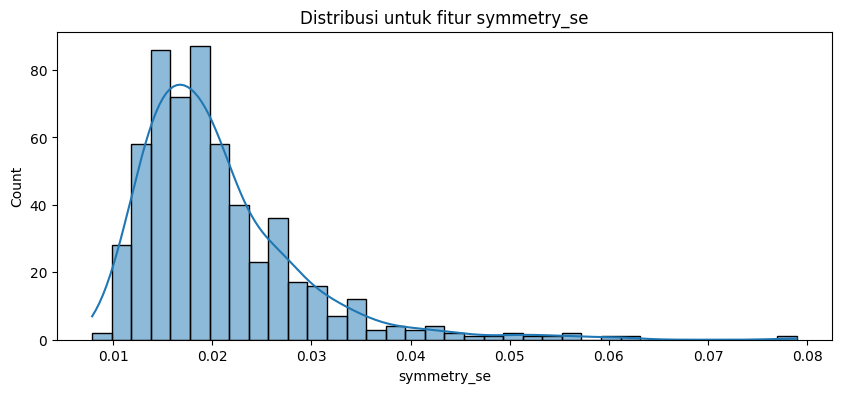

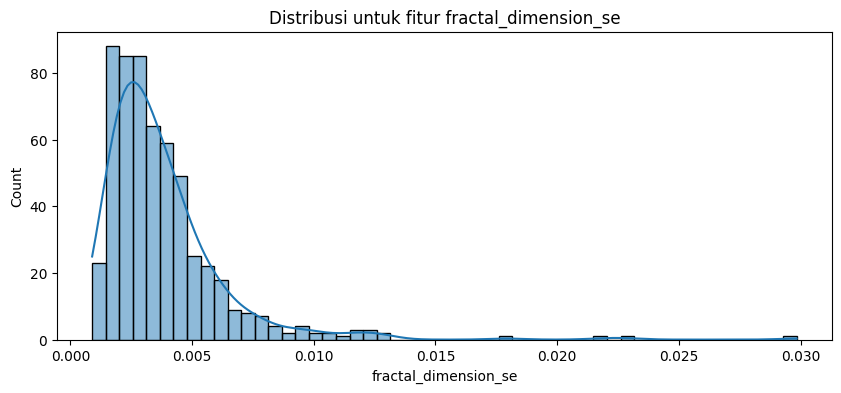

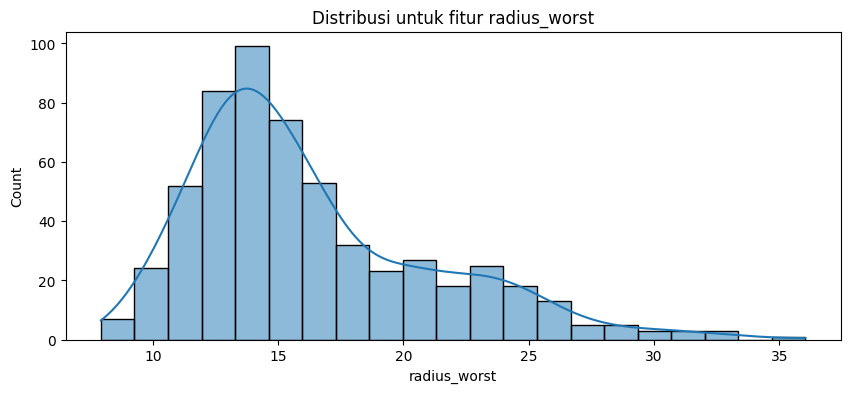

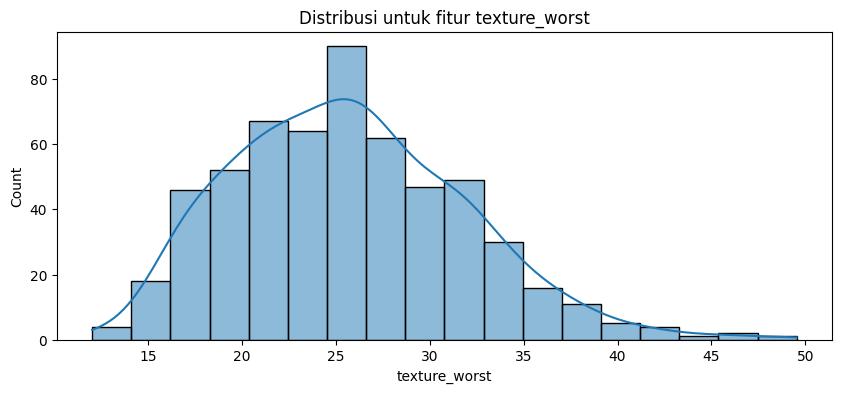

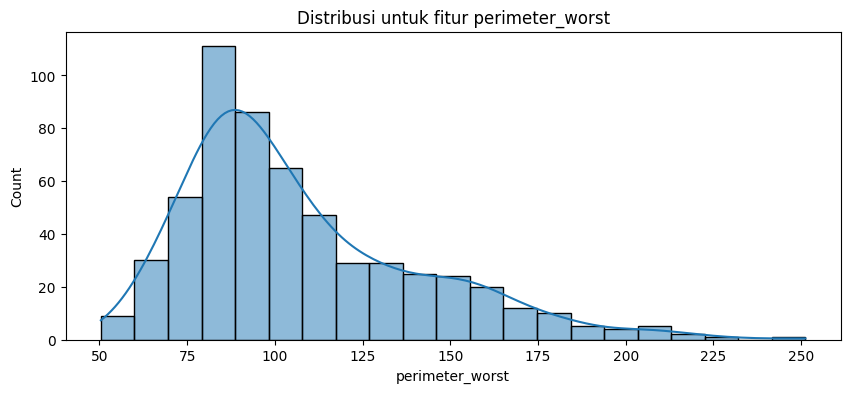

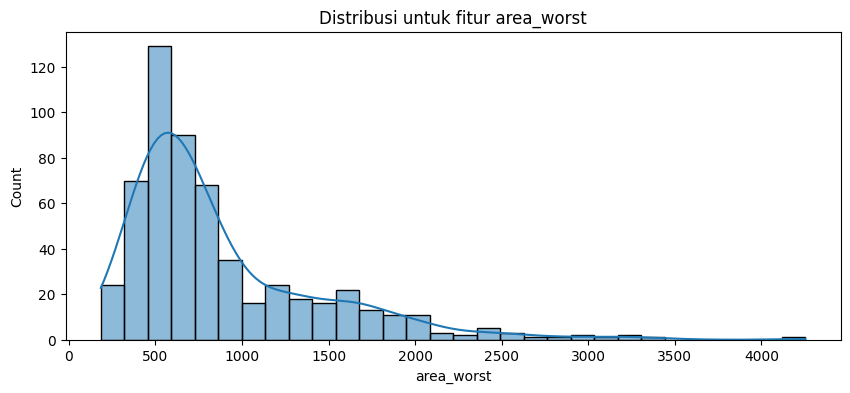

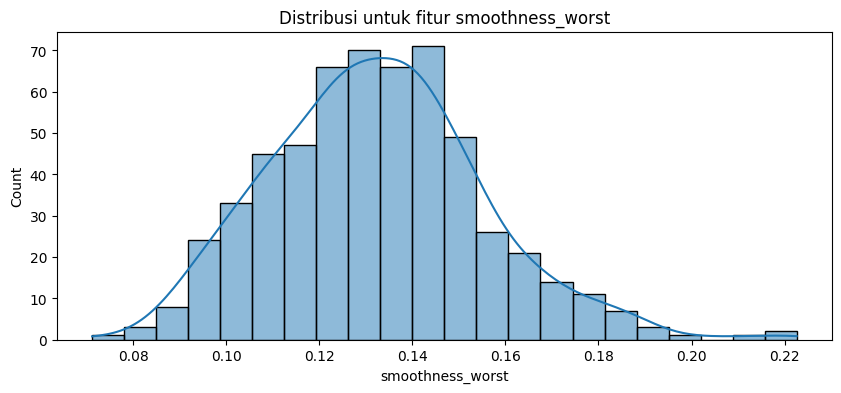

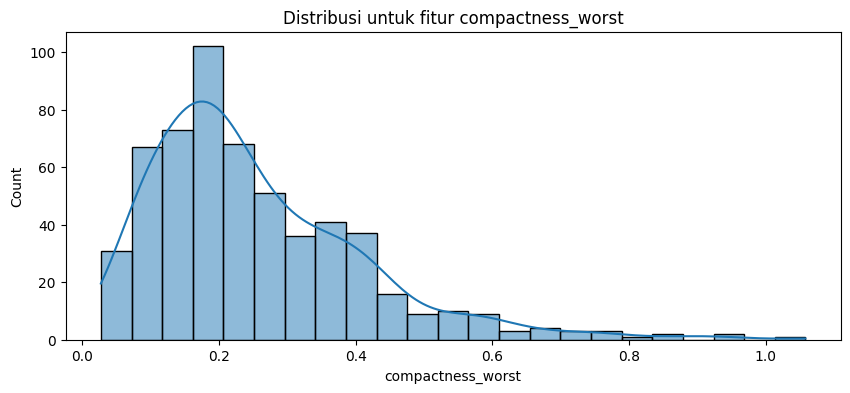

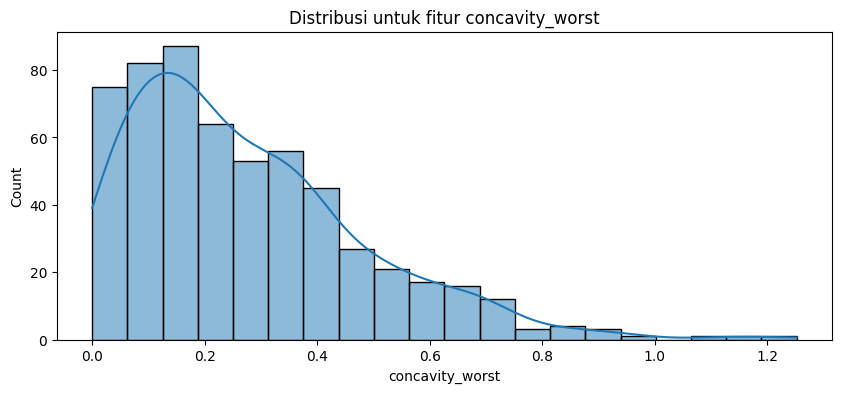

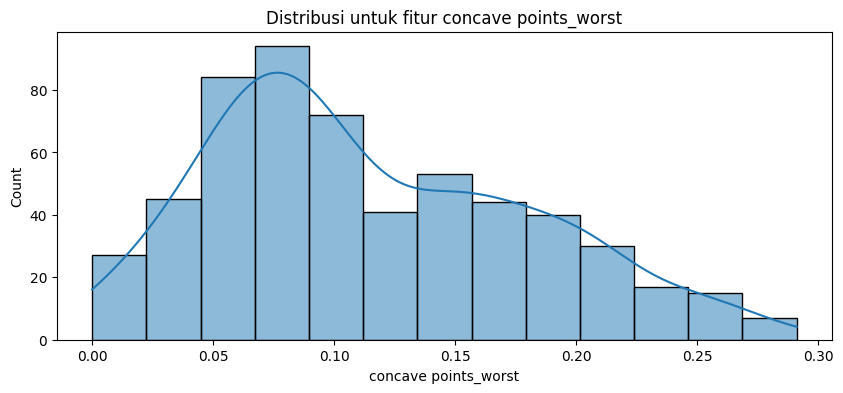

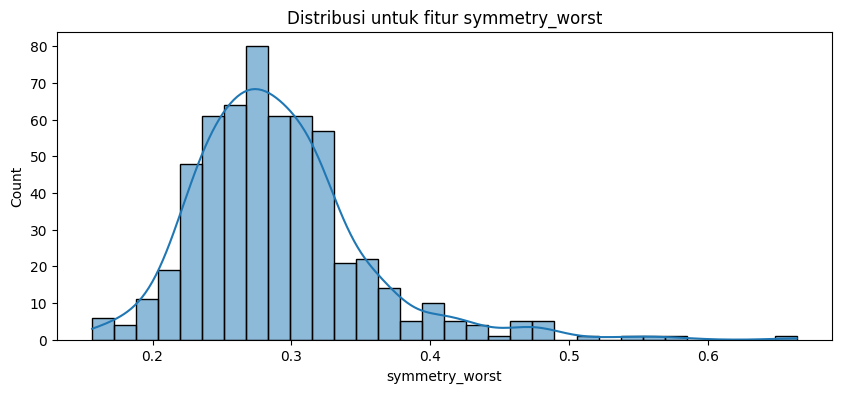

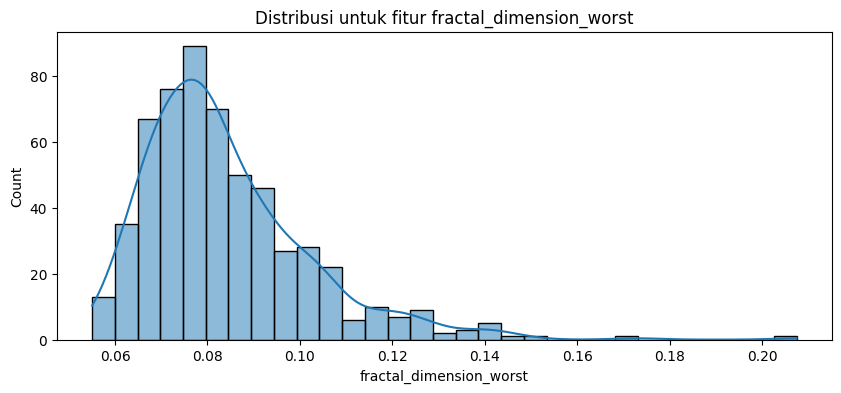

In [7]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features = numeric_features.drop(columns=['Unnamed: 32', 'id'])

for column in numeric_features.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribusi untuk fitur {column}")
    plt.show()

['M' 'B']
diagnosis
B    357
M    212
Name: count, dtype: int64


/tmp/ipykernel_77753/464283137.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diagnosis', data=df, palette='husl')


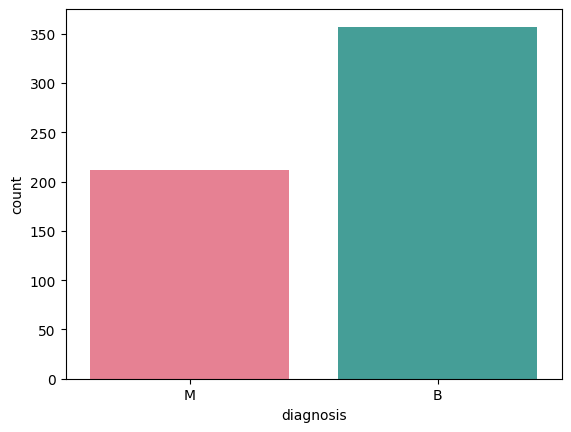

In [8]:
print(df['diagnosis'].unique())
print(df['diagnosis'].value_counts())

sns.countplot(x='diagnosis', data=df, palette='husl')
plt.show()

### 4. Pengecekan Outlier

In [9]:
for column in numeric_features.columns:
    Q1 = numeric_features[column].quantile(0.25)
    Q3 = numeric_features[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    outliers = numeric_features[(numeric_features[column] < lower_bound) | (numeric_features[column] > upper_bound)]
        
    print(f"\nAnalisis untuk {column}:")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {len(outliers) / len(numeric_features) * 100:.2f}%")


Analisis untuk radius_mean:
Jumlah outlier: 14
Persentase outlier: 2.46%

Analisis untuk texture_mean:
Jumlah outlier: 7
Persentase outlier: 1.23%

Analisis untuk perimeter_mean:
Jumlah outlier: 13
Persentase outlier: 2.28%

Analisis untuk area_mean:
Jumlah outlier: 25
Persentase outlier: 4.39%

Analisis untuk smoothness_mean:
Jumlah outlier: 6
Persentase outlier: 1.05%

Analisis untuk compactness_mean:
Jumlah outlier: 16
Persentase outlier: 2.81%

Analisis untuk concavity_mean:
Jumlah outlier: 18
Persentase outlier: 3.16%

Analisis untuk concave points_mean:
Jumlah outlier: 10
Persentase outlier: 1.76%

Analisis untuk symmetry_mean:
Jumlah outlier: 15
Persentase outlier: 2.64%

Analisis untuk fractal_dimension_mean:
Jumlah outlier: 15
Persentase outlier: 2.64%

Analisis untuk radius_se:
Jumlah outlier: 38
Persentase outlier: 6.68%

Analisis untuk texture_se:
Jumlah outlier: 20
Persentase outlier: 3.51%

Analisis untuk perimeter_se:
Jumlah outlier: 38
Persentase outlier: 6.68%

Analis

### 5. Matriks Korelasi dan Preprocess Lebih Awal (Drop Feature Label dan Feature Tidak Penting)

Sedikit prepocessing dilakukan untuk membuat matriks korelasi. Preprocessing yang dimaksud  dalam konteks ini adalah melakukan drop terhadap kolom 'id' dan 'Unnamed: 32' dan juga mengubah kolom 'diagnosis' menjadi nilai numerik

In [10]:
df = df.drop(columns=['id', 'Unnamed: 32', 'diagnosis'], errors='ignore')
# df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


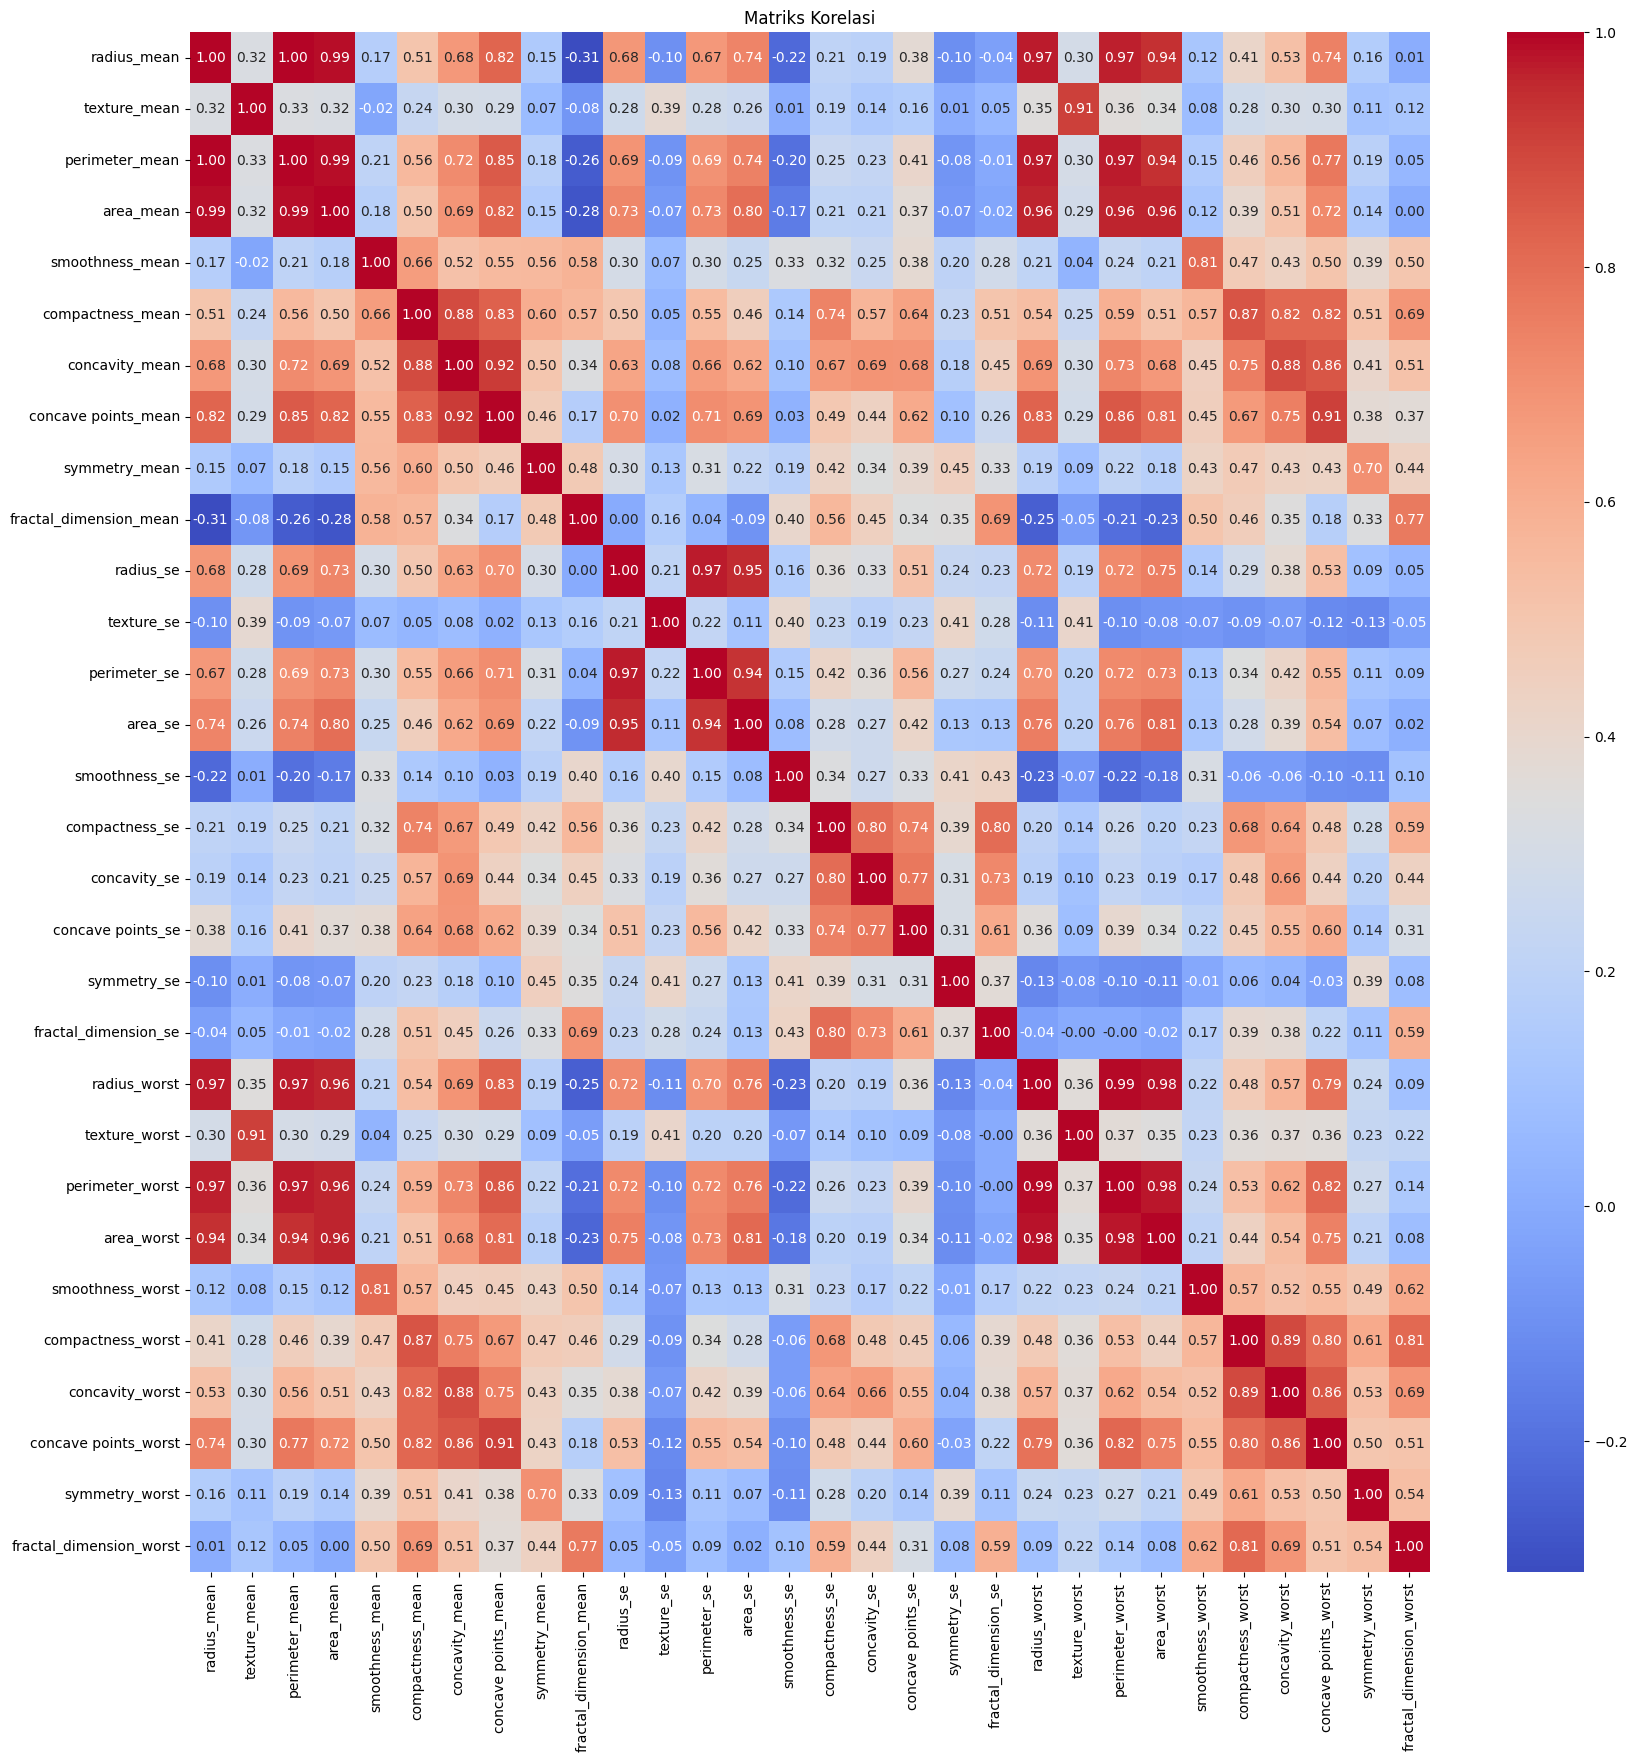

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Matriks Korelasi")
plt.show()

## Data Preprocessing

### 1. Penghapusan Fitur dengan Korelasi Tinggi dan Penghapusan Label 

Penghapusan label dilakukan agar sesuai agar sesuai spesifikasi karena pada bagian 3 ini fokusnya adalah Unsupervised Learning

Alasan di balik penghapusan kolom-kolom ini adalah untuk mengatasi masalah multikolinearitas yang dapat mempengaruhi performa model. Fitur seperti "radius_mean", "perimeter_mean", dan "area_mean" menunjukkan korelasi yang sangat tinggi satu sama lain, sehingga menyimpan semuanya dapat menyebabkan redundansi data. Kolom "worst" juga sering kali memberikan informasi yang mirip dengan kolom "mean", sehingga menghapusnya membantu menyederhanakan model tanpa kehilangan banyak informasi penting.

In [12]:
cols_to_drop = ['radius_worst', 
                'texture_worst', 
                'perimeter_worst', 
                'area_worst', 
                'smoothness_worst', 
                'compactness_worst', 
                'concavity_worst',
                'concave points_worst', 
                'symmetry_worst', 
                'fractal_dimension_worst']
df = df.drop(columns=cols_to_drop)

cols_to_drop = ['perimeter_mean',
                'perimeter_se', 
                'area_mean', 
                'area_se']
df = df.drop(columns=cols_to_drop)

cols_to_drop = ['concavity_mean',
                'concavity_se', 
                'concave points_mean', 
                'concave points_se']

df = df.drop(columns=cols_to_drop)

In [13]:
print(df.columns)

Index(['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean',
       'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se',
       'smoothness_se', 'compactness_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')


### 2. Penghapusan Outlier

In [14]:
for column in df.columns:

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        
    print(f"\nAnalisis untuk {column}:")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {len(outliers) / len(df) * 100:.2f}%")


Analisis untuk radius_mean:
Jumlah outlier: 14
Persentase outlier: 2.46%

Analisis untuk texture_mean:
Jumlah outlier: 7
Persentase outlier: 1.23%

Analisis untuk smoothness_mean:
Jumlah outlier: 6
Persentase outlier: 1.05%

Analisis untuk compactness_mean:
Jumlah outlier: 16
Persentase outlier: 2.81%

Analisis untuk symmetry_mean:
Jumlah outlier: 15
Persentase outlier: 2.64%

Analisis untuk fractal_dimension_mean:
Jumlah outlier: 15
Persentase outlier: 2.64%

Analisis untuk radius_se:
Jumlah outlier: 38
Persentase outlier: 6.68%

Analisis untuk texture_se:
Jumlah outlier: 20
Persentase outlier: 3.51%

Analisis untuk smoothness_se:
Jumlah outlier: 30
Persentase outlier: 5.27%

Analisis untuk compactness_se:
Jumlah outlier: 28
Persentase outlier: 4.92%

Analisis untuk symmetry_se:
Jumlah outlier: 27
Persentase outlier: 4.75%

Analisis untuk fractal_dimension_se:
Jumlah outlier: 28
Persentase outlier: 4.92%


In [15]:
def remove_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

df_cleaned = remove_outliers(df)

In [16]:
for column in df_cleaned.columns:
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
        
    outliers = df_cleaned[(df_cleaned[column] < lower_bound) | (df_cleaned[column] > upper_bound)]
        
    print(f"\nAnalisis untuk {column}:")
    print(f"Jumlah outlier: {len(outliers)}")
    print(f"Persentase outlier: {len(outliers) / len(df_cleaned) * 100:.2f}%")


Analisis untuk radius_mean:
Jumlah outlier: 17
Persentase outlier: 3.84%

Analisis untuk texture_mean:
Jumlah outlier: 2
Persentase outlier: 0.45%

Analisis untuk smoothness_mean:
Jumlah outlier: 1
Persentase outlier: 0.23%

Analisis untuk compactness_mean:
Jumlah outlier: 4
Persentase outlier: 0.90%

Analisis untuk symmetry_mean:
Jumlah outlier: 1
Persentase outlier: 0.23%

Analisis untuk fractal_dimension_mean:
Jumlah outlier: 5
Persentase outlier: 1.13%

Analisis untuk radius_se:
Jumlah outlier: 28
Persentase outlier: 6.32%

Analisis untuk texture_se:
Jumlah outlier: 6
Persentase outlier: 1.35%

Analisis untuk smoothness_se:
Jumlah outlier: 7
Persentase outlier: 1.58%

Analisis untuk compactness_se:
Jumlah outlier: 9
Persentase outlier: 2.03%

Analisis untuk symmetry_se:
Jumlah outlier: 11
Persentase outlier: 2.48%

Analisis untuk fractal_dimension_se:
Jumlah outlier: 11
Persentase outlier: 2.48%


Meskipun beberapa fitur dalam dataset ini memiliki outlier, jumlahnya relatif kecil dibandingkan dengan keseluruhan data, seperti terlihat dari analisis di mana sebagian besar outlier hanya berjumlah sekitar 1-6% dari total data. Jadi penghapusan outlier ini saya anggap cukup

### 3. Perbaikan Distribusi dengan Log Transformation dan Normalisasi dengan Z-Score

Berdasarkan hasil EDA, banyak fitur dalam dataset ini terdistribusi secara right-skewed, yang dapat menyebabkan model machine learning kesulitan dalam menangkap pola dengan akurat. Untuk mengatasi ini log transformation digunakan untuk mengurangi skewness dan mendekatkan distribusi fitur ke bentuk normal.

In [17]:
df_transformed = df_cleaned.copy()
for column in df_transformed.columns:
    if df_transformed[column].skew() > 0.5:
        df_transformed[column] = np.log1p(df_transformed[column])  

In [18]:
scaler = StandardScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_transformed), columns=df_transformed.columns)

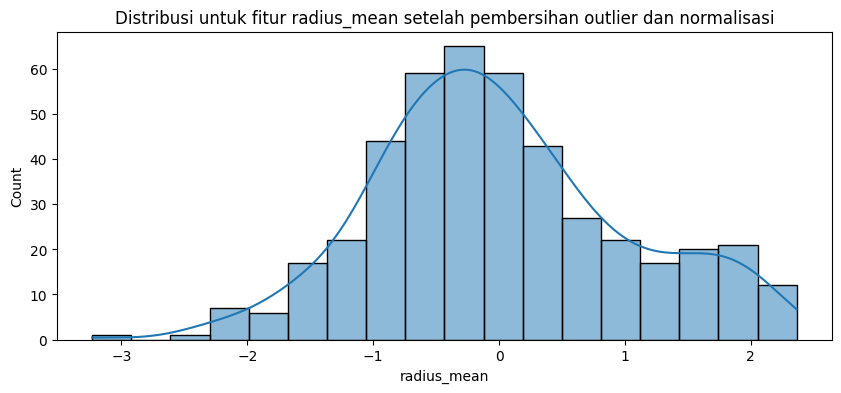

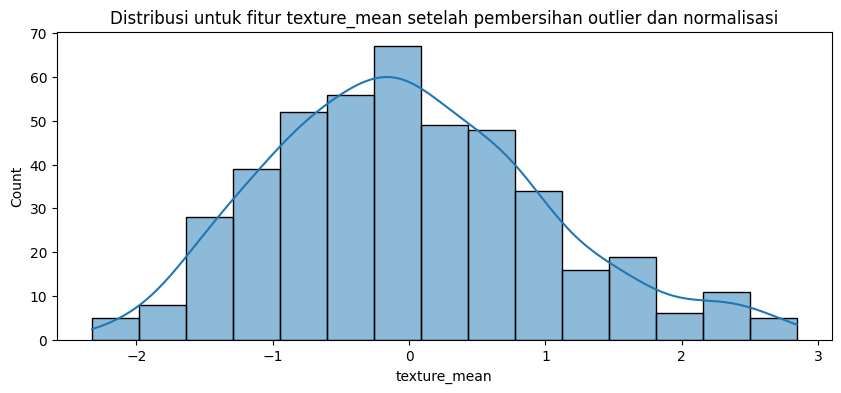

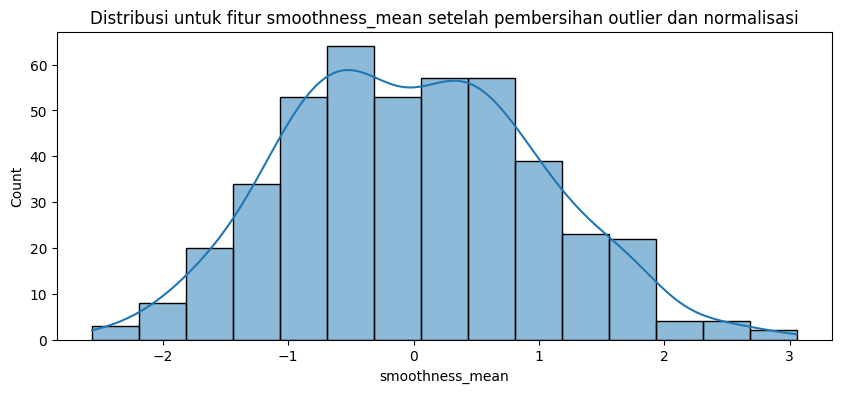

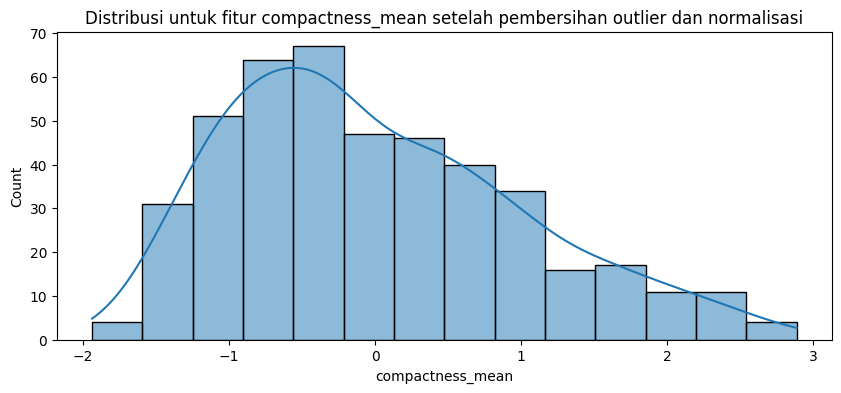

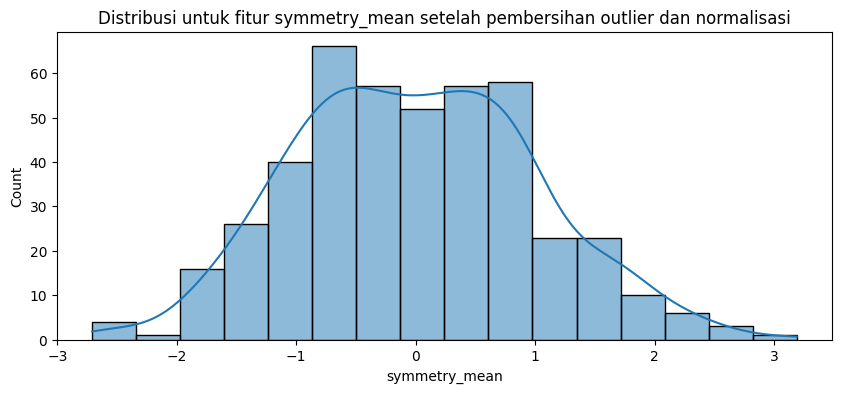

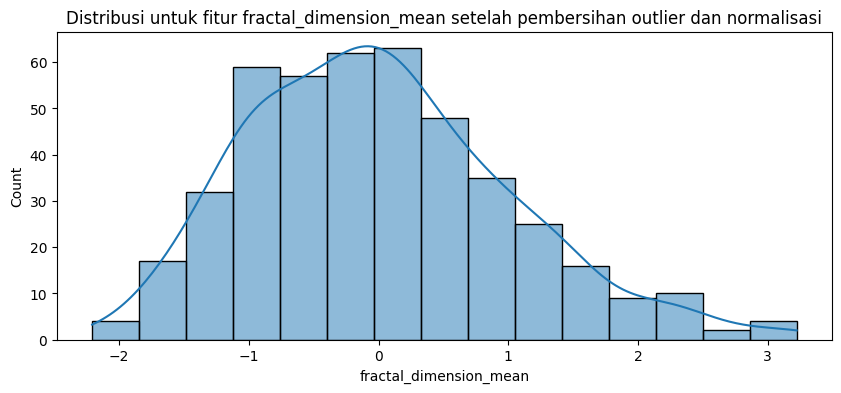

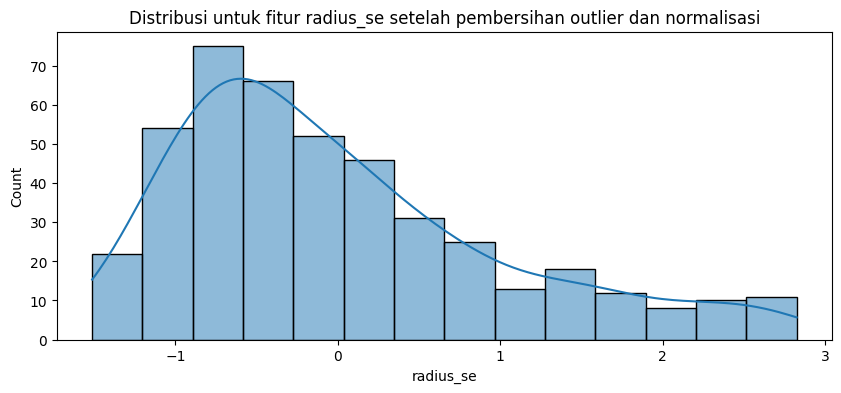

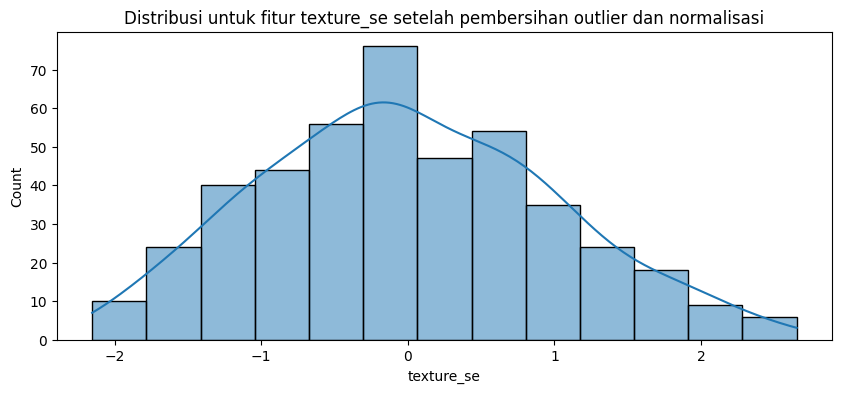

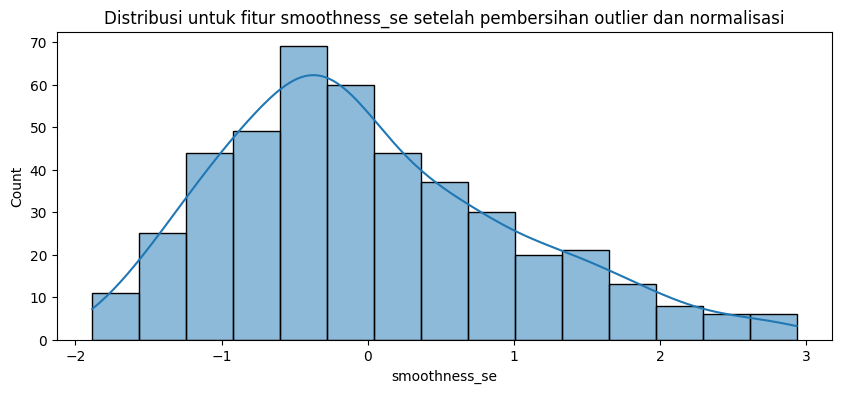

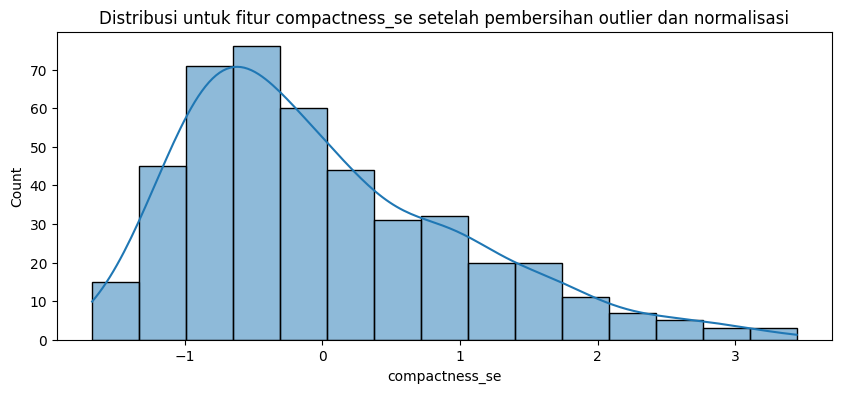

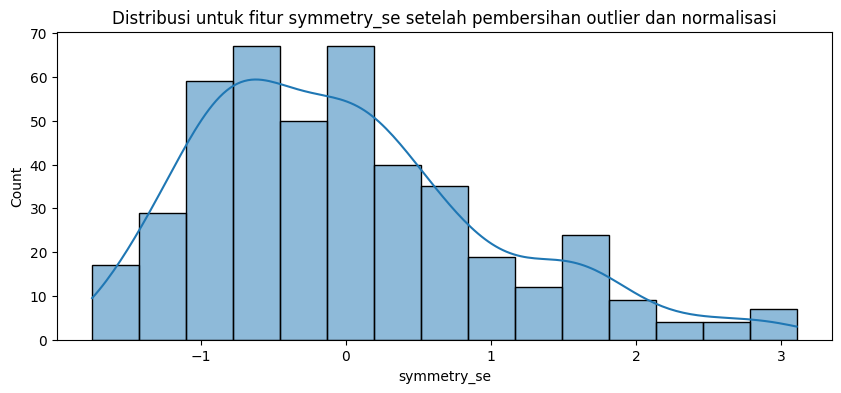

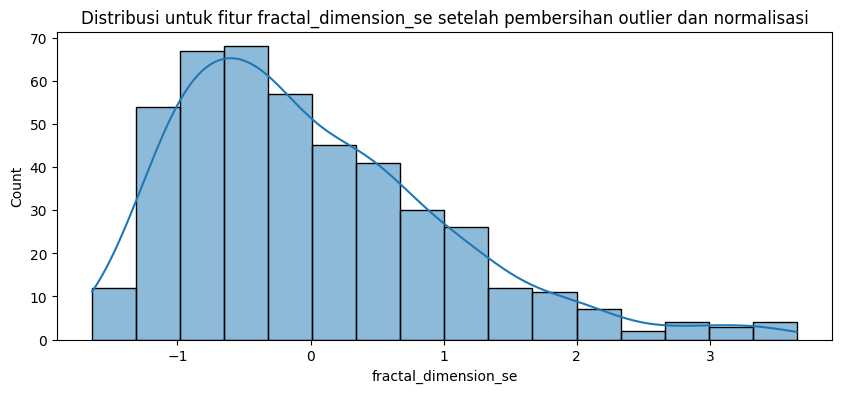

In [19]:
for column in df_normalized.columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df_normalized[column], kde=True)
    plt.title(f"Distribusi untuk fitur {column} setelah pembersihan outlier dan normalisasi")
    plt.show()

### 4. Penghapusan Baris Duplikat

In [20]:
df = df_normalized

df = df.drop_duplicates()

## Modeling dan Validasi

In [21]:
X = df.values

### 1. K-Means

In [40]:
module_name = "kmeans_scratch"
module_path = os.path.join('unsupervised-learning', module_name + '.py')

spec = importlib.util.spec_from_file_location(module_name, module_path)
kmeans_module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = kmeans_module
spec.loader.exec_module(kmeans_module)

KMeansScratch = kmeans_module.KMeansScratch

In [47]:
models = {
    'KMeansScratch': KMeansScratch(n_clusters=2, max_iter=300, init_method='kmeans++'),
    'KMeans_Sklearn': KMeans(n_clusters=2, max_iter=300, random_state=42)
}

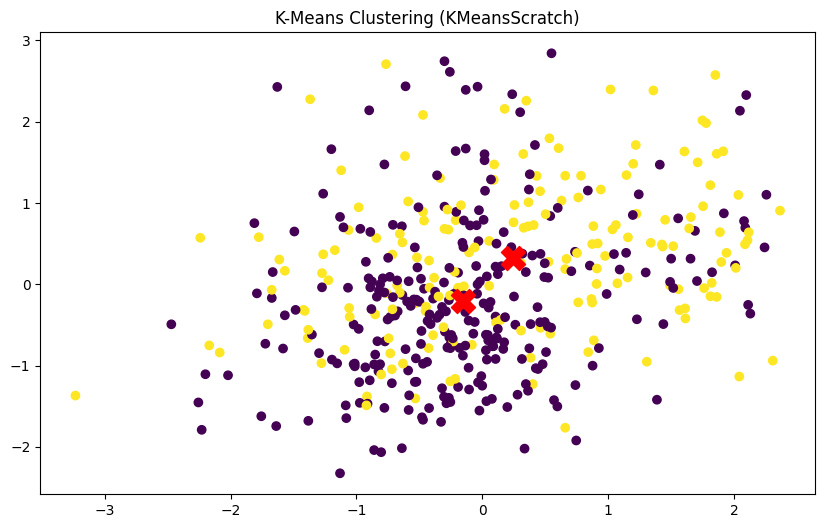

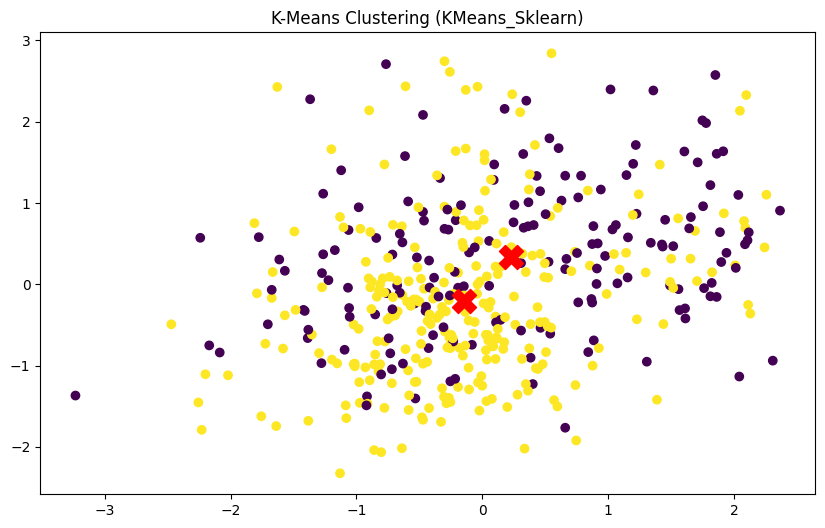

In [48]:
labels = {}

for model_name, model in models.items():
    labels[model_name] = model.fit_predict(X)

    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels[model_name], cmap='viridis')
    
    if model_name == 'KMeansScratch':
        plt.scatter(model.centroids[:, 0], model.centroids[:, 1], s=300, c='red', marker='X')
    else:
        plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', marker='X')

    plt.title(f"K-Means Clustering ({model_name})")
    plt.show()


In [49]:
for model_name, model_labels in labels.items():
    score = silhouette_score(X, model_labels)
    print(f"Silhouette Score untuk {model_name}: {score:.4f}")

Silhouette Score untuk KMeansScratch: 0.2241
Silhouette Score untuk KMeans_Sklearn: 0.2235


### 2. DBSCAN

In [50]:
module_name = "dbscan"
module_path = os.path.join('unsupervised-learning', module_name + '.py')

spec = importlib.util.spec_from_file_location(module_name, module_path)
dbscan_module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = dbscan_module
spec.loader.exec_module(dbscan_module)

DBSCANScratch = dbscan_module.DBSCANScratch

In [67]:
models = {
    'DBSCANScratch': DBSCANScratch(eps=0.9, min_samples=2, metric='euclidean'),
    'DBSCAN_Sklearn': SK_DBSCAN(eps=0.9, min_samples=2, metric='euclidean')
}

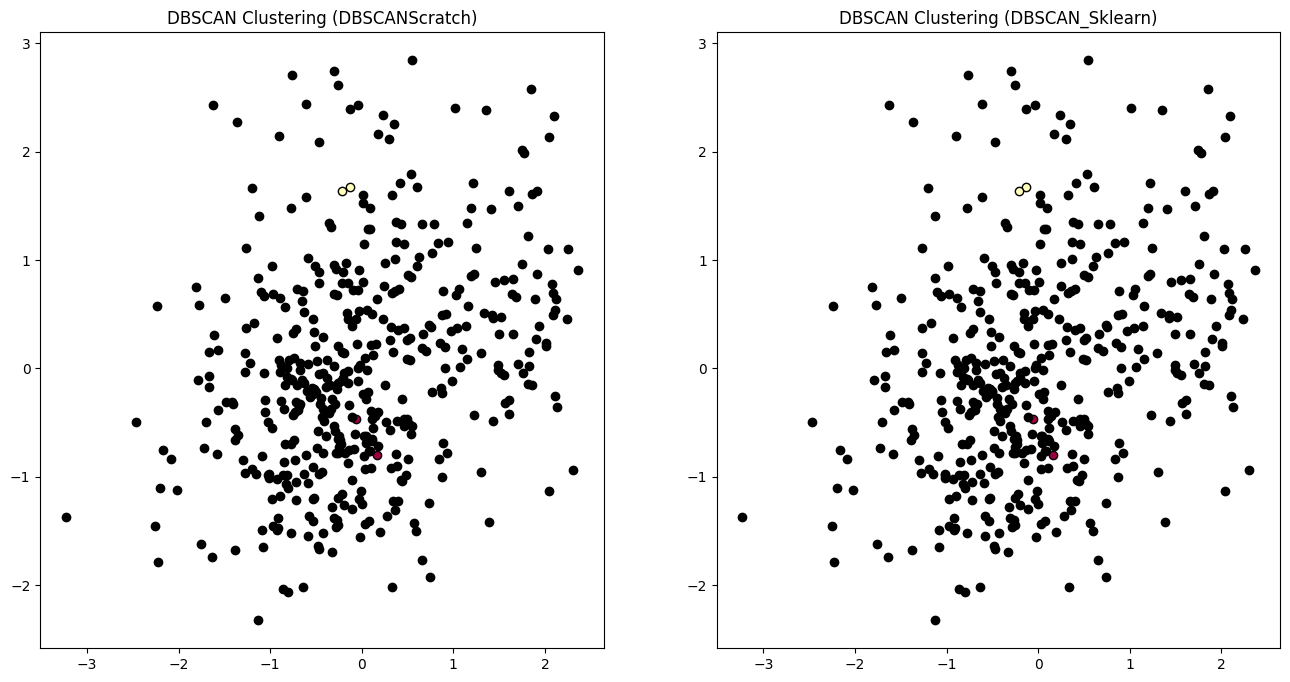

In [68]:

labels = {}

for model_name, model in models.items():
    labels[model_name] = model.fit_predict(X)

plt.figure(figsize=(16, 8))

for i, (model_name, model_labels) in enumerate(labels.items(), 1):
    plt.subplot(1, 2, i)
    unique_labels = set(model_labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0, 0, 0, 1] 

        class_member_mask = (model_labels == k)
        xy = X[class_member_mask]
        plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

    plt.title(f"DBSCAN Clustering ({model_name})")

plt.show()

In [69]:
for model_name, model_labels in labels.items():
    if len(set(model_labels)) > 1:  
        score = silhouette_score(X, model_labels)
        print(f"Silhouette Score untuk {model_name}: {score:.4f}")
    else:
        print(f"Silhouette Score untuk {model_name}: Undefined (Hanya 1 cluster)")

Silhouette Score untuk DBSCANScratch: -0.1434
Silhouette Score untuk DBSCAN_Sklearn: -0.1434


### 3. PCA

In [70]:
#load ulang
X = df_normalized

In [92]:
module_name = "pca"
module_path = os.path.join('unsupervised-learning', module_name + '.py')

spec = importlib.util.spec_from_file_location(module_name, module_path)
pca_module = importlib.util.module_from_spec(spec)
sys.modules[module_name] = pca_module
spec.loader.exec_module(pca_module)

PCA_Scratch = pca_module.PCA_Scratch

In [93]:
pca_models = {
    'PCA_Scratch': PCA_Scratch(n_components=2),
    'PCA_Sklearn': SKPCA(n_components=2)
}

In [94]:
pca_results = {}
explained_variance_ratios = {}

for model_name, model in pca_models.items():
    if model_name == 'PCA_Scratch':
        model.fit(X)
        X_pca = model.transform(X)
        explained_variance_ratios[model_name] = model.explained_variance_ratio_  # Mengakses atribut tanpa kurung
    else:
        X_pca = model.fit_transform(X)
        explained_variance_ratios[model_name] = model.explained_variance_ratio_

    pca_results[model_name] = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(model.n_components)])

for model_name, result in pca_results.items():
    print(f"\nHasil PCA untuk {model_name}:")
    print(result.head())
    print(result.tail())



Hasil PCA untuk PCA_Scratch:
        PC1       PC2
0  0.642877  2.500008
1 -3.520458  2.475003
2 -2.335805  1.287010
3 -4.059318 -1.522865
4  0.595347  2.455078
          PC1       PC2
438  0.839434 -0.060064
439 -1.284349 -2.156808
440 -0.721069  0.948424
441 -1.670323  0.106531
442 -0.609827  2.278635

Hasil PCA untuk PCA_Sklearn:
        PC1       PC2
0 -0.642877  2.500008
1  3.520458  2.475003
2  2.335805  1.287010
3  4.059318 -1.522865
4 -0.595347  2.455078
          PC1       PC2
438 -0.839434 -0.060064
439  1.284349 -2.156808
440  0.721069  0.948424
441  1.670323  0.106531
442  0.609827  2.278635


In [95]:
for model_name, variance_ratio in explained_variance_ratios.items():
    print(f"Explained variance ratio ({model_name}):", variance_ratio)

Explained variance ratio (PCA_Scratch): [0.34345784 0.1898338 ]
Explained variance ratio (PCA_Sklearn): [0.34345784 0.1898338 ]


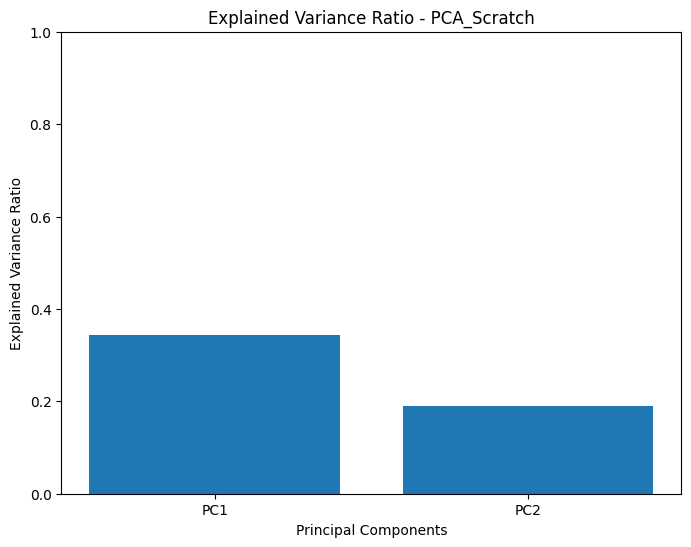

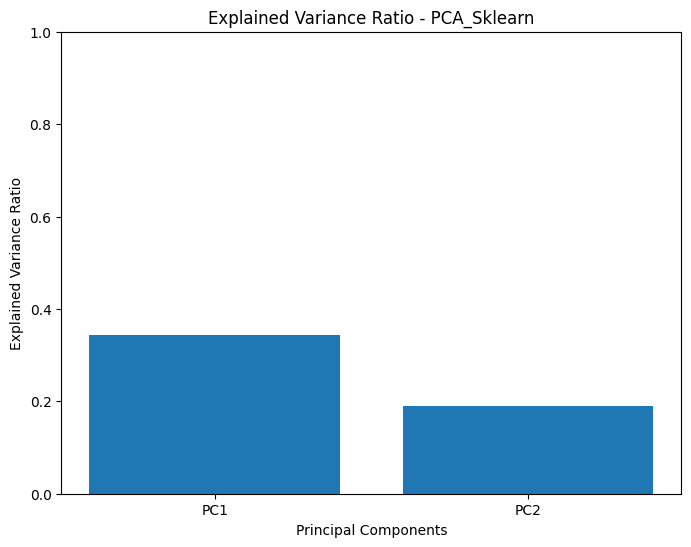

In [96]:
for model_name, variance_ratio in explained_variance_ratios.items():
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(variance_ratio) + 1), variance_ratio, tick_label=[f'PC{i}' for i in range(1, len(variance_ratio) + 1)])
    plt.title(f'Explained Variance Ratio - {model_name}')
    plt.xlabel('Principal Components')
    plt.ylabel('Explained Variance Ratio')
    plt.ylim(0, 1)
    plt.show()